# Palmers Penguins 
This notebook contains my analysis of the famous palmer penguins dataset.
The data set is available [on GitHub](https://allisonhorst.github.io/palmerpenguins/)


# Background of the Palmer Penguins dataset 

The Palmer Penguins dataset, orginally created to study Antarctic penguins’ foraging behavior and relationship with environmental variability, is a commonly used dataset for data exploration and visualization.

The dataset was collected by [Dr.Kristen Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php) with  the [Palmer Station, Antarctica, Long-Term Ecological Research program](https://pallter.marine.rutgers.edu/).

The dataset tracks three species of penguin across three Antartic islands measuring different attributes of the penguin i.e. flipper length, body mass, sex and bill length and depth.

##### Species:
|Adelie    |Gentoo | Chinstrap|
|-----------|---------------|------------|
|![Adelie](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e3/Hope_Bay-2016-Trinity_Peninsula%E2%80%93Ad%C3%A9lie_penguin_%28Pygoscelis_adeliae%29_04.jpg/173px-Hope_Bay-2016-Trinity_Peninsula%E2%80%93Ad%C3%A9lie_penguin_%28Pygoscelis_adeliae%29_04.jpg)|![Gentoo](https://upload.wikimedia.org/wikipedia/commons/thumb/3/32/Gentoo_Penguin_Baby_%2824940372635%29.jpg/209px-Gentoo_Penguin_Baby_%2824940372635%29.jpg)|![Chinstrap](https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/South_Shetland-2016-Deception_Island%E2%80%93Chinstrap_penguin_%28Pygoscelis_antarctica%29_04.jpg/160px-South_Shetland-2016-Deception_Island%E2%80%93Chinstrap_penguin_%28Pygoscelis_antarctica%29_04.jpg)|

The version of the dataset used in this project focuses on a reduced amount of variables from the original dataset, including:
   - Species of penguin
   - Island the penguin was located on
   - Bill length and depth (mm)
   - Flipper length (mm)
   - Body mass (g)
   - Sex of the penguin




In [116]:
# Data frames. 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [117]:
# Load the penguins data set.
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

In [123]:
# Take a look at the data to see number of each species per island

print(f'Torgerson island is home to {torgersen_df["species"].value_counts()}')
print(f'\nBiscoe island is home to {biscoe_df["species"].value_counts()}')
print(f'\nDream island is home to {dream_df["species"].value_counts()}')

Torgerson island is home to species
Adelie    52
Name: count, dtype: int64

Biscoe island is home to species
Gentoo    124
Adelie     44
Name: count, dtype: int64

Dream island is home to species
Chinstrap    68
Adelie       56
Name: count, dtype: int64


#### Number of each species per island

|    |Torgerson island|Biscoe island|Dream island|
|-----------|---------------:|------------:|------------:|
|Adelie     |            52|         44|56|
|Chinstrap  |            0|         0|68|
|Gentoo     |            0|         124|0|


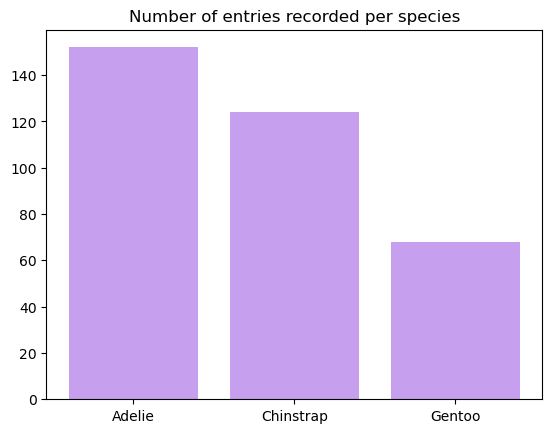

In [156]:
# Plot showing how many entries there are per species

species_of_peng = np.array(df['species'].unique()) # setting variable to check the species column and return the unique values in the column
num_of_records = np.array(df['species'].value_counts()) # setting variables to count the number of penguins recorded per species
plt.bar(species_of_peng, num_of_records, color = "xkcd:lavender") #plotting bar chart to show the different species of penguin on the x axis and the number of entries recorded on the y axis
plt.title ("Number of entries recorded per species") # adding title to chart
plt.show() # showing bar chart

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


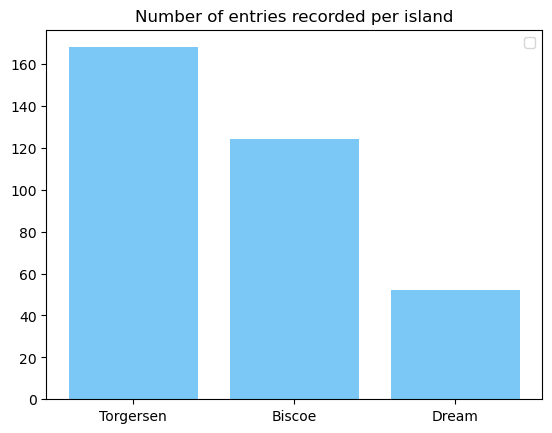

In [157]:
# Plot showing how many entries there are per species

island_peng_found = np.array(df['island'].unique()) # setting variable to check the island column and return the unique values in the column
num_of_records = np.array(df['island'].value_counts()) # setting variables to count the number of penguins recorded per island
plt.bar(island_peng_found, num_of_records, color = "xkcd:lightblue") #plotting bar chart to show the different islands on the x axis and the number of entries per island
plt.title ("Number of entries recorded per island") # setting the title for the plot
plt.show() # shows the chart

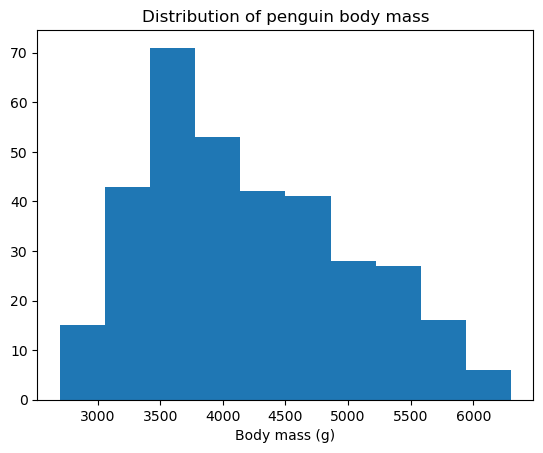

In [173]:
# Plotting a histogram showing the distribution of body mass across the dataset

plt.hist(df["body_mass_g"])
plt.xlabel('Body mass (g)') # setting label for x axis 
plt.title("Distribution of penguin body mass") # setting plot title
plt.show() # showing the plot

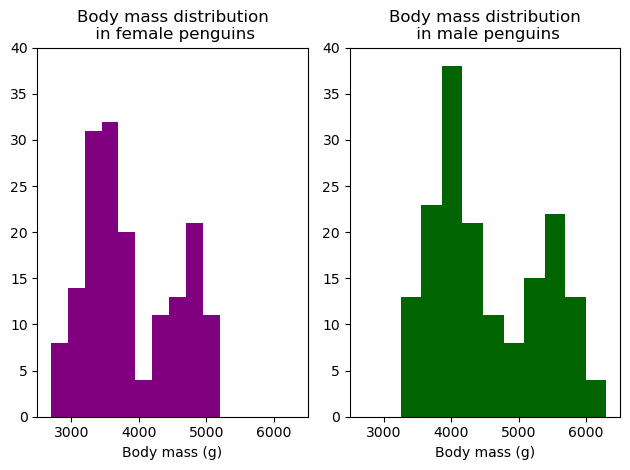

In [148]:
#Testing 2 histograms in one image
# Filter the dataframe based on sex

# Filter the data based on the sex
female_df = df[df['sex'] == 'FEMALE']
male_df = df[df['sex'] == 'MALE']

# Plot for female penguins
plt.subplot(1, 2, 1)  # Create a subplot for female penguins
plt.hist(female_df['body_mass_g'], color='PURPLE') # plotting histogram of the body mass of female penguins
plt.title('Body mass distribution\n in female penguins') # adding title to the plot
plt.xlabel('Body mass (g)') # setting label for the x axis
plt.xlim([2500, 6500]) # setting limit values for the x axis
plt.ylim([0, 40]) # setting limit values for the y axis

# Plot for male penguins
plt.subplot(1, 2, 2)  # Create a subplot for male penguins
plt.hist(male_df['body_mass_g'], color='darkgreen') # plotting histogram of the body mass of female penguins
plt.title('Body mass distribution\n in male penguins') # adding title to the plot
plt.xlabel('Body mass (g)') # setting label for the x axis
plt.xlim([2500, 6500]) # setting limit values for the x axis
plt.ylim([0, 40]) # setting limit values for the y axis

plt.tight_layout()  # Adjust the layout of subplots to prevent overlapping
plt.show()

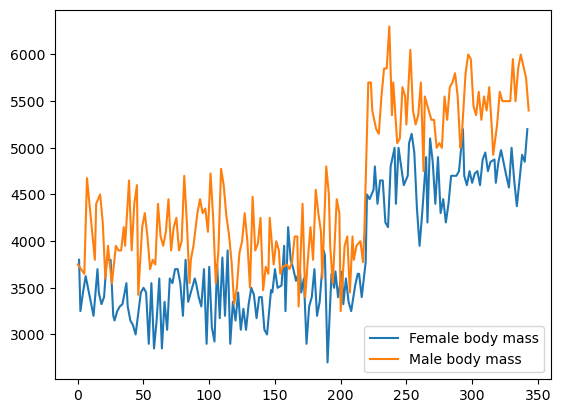

In [171]:
# Creating a line plot showing the body mass for the male and female penguins

plt.plot(female_df['body_mass_g'], label="Female body mass") # adding a line using the data filtered on the FEMALE results in the sex column and setting the label for the legend
plt.plot(male_df['body_mass_g'], label="Male body mass") # adding a line using the data filtered on the MALE results in the sex column and setting the label for the legend
plt.legend(loc="lower right") # adding legend and fixing to the bottom right corner of the plot
plt.show() # show plot

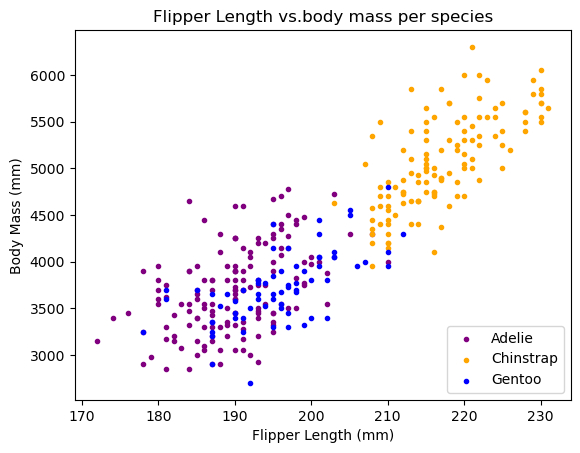

In [181]:
# flipper_length_mm	vs body_mass_g plot colour coded per species
# Filter the data based on the species
adelie_data = df[df['species'] == 'Adelie']
gentoo_data = df[df['species'] == 'Gentoo']
chinstrap_data = df[df['species'] == 'Chinstrap']

# Get bill length and bill depth for different species of penguins
adelie_flip_len = adelie_data['flipper_length_mm'].to_numpy()
adelie_body_mass = adelie_data['body_mass_g'].to_numpy()

gentoo_flip_len = gentoo_data['flipper_length_mm'].to_numpy()
gentoo_body_mass = gentoo_data['body_mass_g'].to_numpy()

chinstrap_flip_len = chinstrap_data['flipper_length_mm'].to_numpy()
chinstrap_body_mass = chinstrap_data['body_mass_g'].to_numpy()

# Plotting Adelie penguins
plt.scatter(adelie_flip_len, adelie_body_mass, color='PURPLE', label='Adelie', marker = ".")

# Plotting Chinstrap penguins
plt.scatter(gentoo_flip_len, gentoo_body_mass, color='orange', label='Chinstrap', marker = ".")

# Plotting Gentoo penguins
plt.scatter(chinstrap_flip_len, chinstrap_body_mass, color='blue', label='Gentoo', marker = ".")

# Set labels and title
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (mm)')
plt.title('Flipper Length vs.body mass per species')

# Showing legend in bottom right corner
plt.legend(loc = "lower right")
# Show the plot
plt.show()


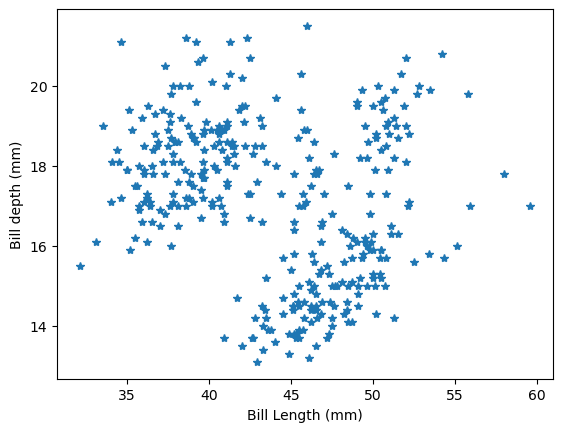

In [186]:
#bill_length_mm	vs bill_depth_mm

bill_len = df['bill_length_mm']
bill_depth = df['bill_depth_mm']

# Simple plot
plt.plot(bill_len, bill_depth, '*')

# Axis labels
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill depth (mm)')
plt.show()

# Create a color map for the sex of the penguin


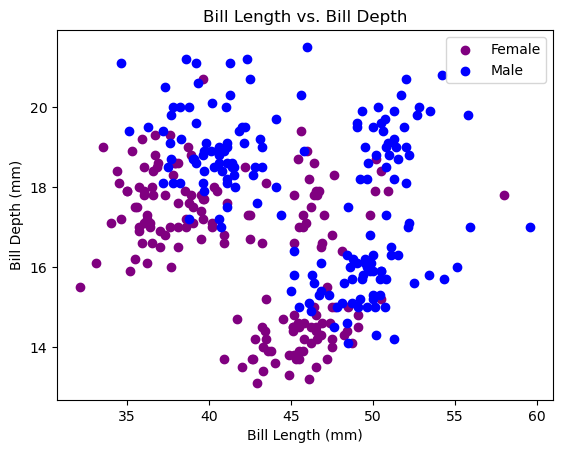

In [130]:
# Get bill length and bill depth for female and male penguins
female_bill_len = female_df['bill_length_mm'].to_numpy()
female_bill_depth = female_df['bill_depth_mm'].to_numpy()

male_bill_len = male_df['bill_length_mm'].to_numpy()
male_bill_depth = male_df['bill_depth_mm'].to_numpy()

# Plotting female penguins
plt.scatter(female_bill_len, female_bill_depth, color='PURPLE', label='Female')

# Plotting male penguins
plt.scatter(male_bill_len, male_bill_depth, color='blue', label='Male')

# Set labels and title
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.title('Bill Length vs. Bill Depth')

# Show legend
plt.legend()
# Show the plot
plt.show()


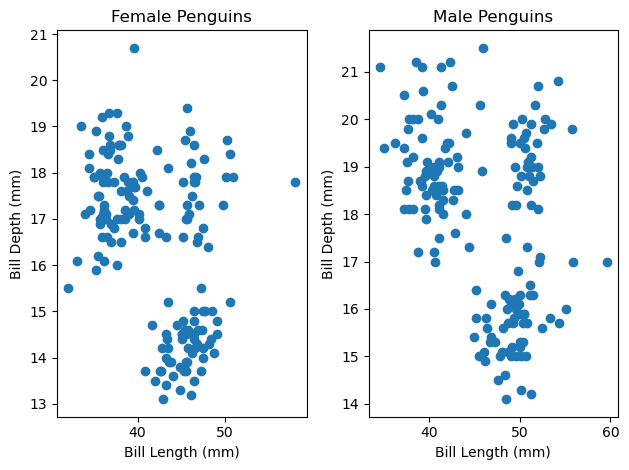

In [132]:
#Testing 2 plots in one graph
# Filter the dataframe based on sex

# Plot for female penguins
plt.subplot(1, 2, 1)  # Create a subplot for female penguins
plt.scatter(female_df['bill_length_mm'], female_df['bill_depth_mm'])
plt.title('Female Penguins')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')

# Plot for male penguins
plt.subplot(1, 2, 2)  # Create a subplot for male penguins
plt.scatter(male_df['bill_length_mm'], male_df['bill_depth_mm'])
plt.title('Male Penguins')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')


plt.tight_layout()  # Adjust the layout of subplots to prevent overlapping
plt.show()


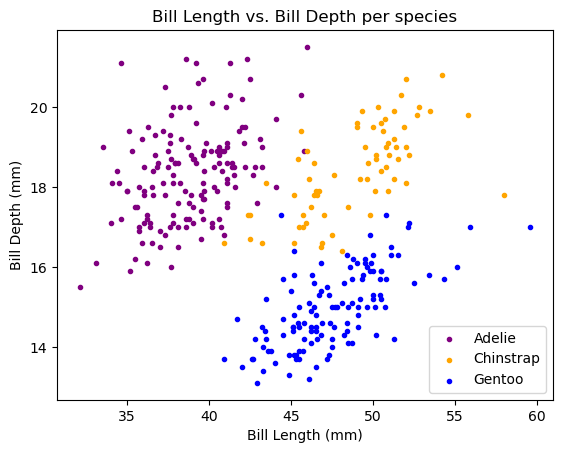

In [187]:

# Filter the data based on the species
adelie_data = df[df['species'] == 'Adelie']
gentoo_data = df[df['species'] == 'Gentoo']
chinstrap_data = df[df['species'] == 'Chinstrap']

# Get bill length and bill depth for different species of penguins
adelie_bill_len = adelie_data['bill_length_mm'].to_numpy()
adelie_bill_depth = adelie_data['bill_depth_mm'].to_numpy()

gentoo_bill_len = gentoo_data['bill_length_mm'].to_numpy()
gentoo_bill_depth = gentoo_data['bill_depth_mm'].to_numpy()

chinstrap_bill_len = chinstrap_data['bill_length_mm'].to_numpy()
chinstrap_bill_depth = chinstrap_data['bill_depth_mm'].to_numpy()

# Plotting Adelie penguins
plt.scatter(adelie_bill_len, adelie_bill_depth, color='PURPLE', label='Adelie', marker = '.')

# Plotting Chinstrap penguins
plt.scatter(chinstrap_bill_len, chinstrap_bill_depth, color='orange', label='Chinstrap', marker='.')

# Plotting Gentoo penguins
plt.scatter(gentoo_bill_len, gentoo_bill_depth, color='blue', label='Gentoo', marker='.')

# Set labels and title
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.title('Bill Length vs. Bill Depth per species')

# Showing legend in bottom right corner
plt.legend(loc = "lower right")
# Show the plot
plt.show()


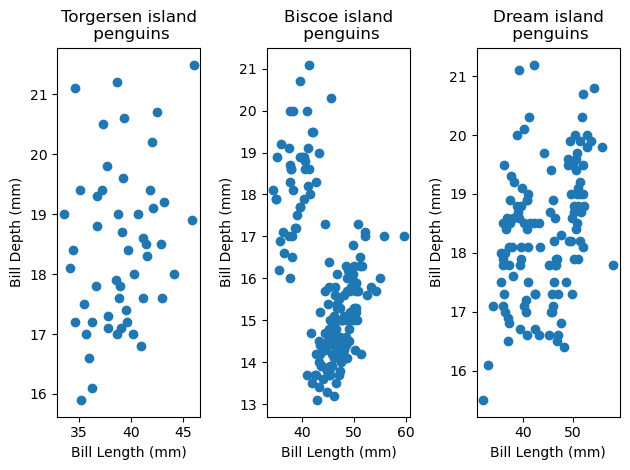

In [189]:
#Testing 3 plots in one graph
# Filter the dataframe based on location
torgersen_df = df[df['island'] == 'Torgersen']
biscoe_df = df[df['island'] == 'Biscoe']
dream_df = df[df['island'] == 'Dream']

# Plot for Torgersen penguins
plt.subplot(1, 3, 1)  # Create a subplot for penguins based in Torgersen island
plt.scatter(torgersen_df['bill_length_mm'], torgersen_df['bill_depth_mm'])
plt.title('Torgersen island\n penguins')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')

# Plot for Biscoe penguins
plt.subplot(1, 3, 2)  # Create a subplot for penguins based in Biscoe island
plt.scatter(biscoe_df['bill_length_mm'], biscoe_df['bill_depth_mm'])
plt.title('Biscoe island\n penguins')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')

# Plot for Dream penguins
plt.subplot(1, 3, 3)  # Create a subplot for penguins based in Dream island
plt.scatter(dream_df['bill_length_mm'], dream_df['bill_depth_mm'])
plt.title('Dream island\n penguins')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')


plt.tight_layout()  # Adjust the layout of subplots to prevent overlapping
plt.show()

### Next actions: Ideas for plots 
sub plot w/ 6 unique plots:
bill lenght vs bill depth, bill lenght vs flipper len, bill lenght vs body mass, bill depth vs flipper len, bill depth vs body mass, flipper len vs body mass

***
### End